In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data_cleaned = pd.read_csv('data_cleaned.csv')
df_cleaned = data_cleaned.copy()

In [3]:
df_cleaned.head()

brand                   model    year  mileage  \
0          Honda   Pilot Special Edition  2021.0  51299.0   
1  Mercedes-Benz  GL-Class GL 450 4MATIC  2014.0  79279.0   
2     Mitsubishi      Outlander Sport SE  2021.0  31976.0   
3        Porsche                     968  1994.0  92025.0   
4           MINI          Hardtop Cooper  2016.0  43418.0   

                            engine  engine_size       transmission  \
0             3.5L V6 24V GDI SOHC          3.5  9-Speed Automatic   
1  4.7L V8 32V GDI DOHC Twin Turbo          4.7  7-Speed Automatic   
2            2.0L I4 16V MPFI DOHC          2.0      Automatic CVT   
3            3.0L I4 16V MPFI DOHC          3.0  6-Speed Automatic   
4       1.5L I3 12V GDI DOHC Turbo          1.5  6-Speed Automatic   

   automatic_transmission fuel_type         drivetrain  min_mpg  max_mpg  \
0                     1.0  Gasoline   Four-wheel Drive     19.0     26.0   
1                     1.0  Gasoline   Four-wheel Drive     21.0     28.0   
2                     1.0  Gasoline   Four-wheel Drive     24.0     31.0   
3                     1.0  Gasoline   Rear-wheel Drive     10.0     16.0   
4                     1.0  Gasoline  Front-wheel Drive     21.0     31.0   

   damaged  first_owner  personal_using  turbo  alloy_wheels  \
0      0.0          1.0             1.0    0.0           1.0   
1      0.0          0.0             1.0    1.0           1.0   
2      0.0          1.0             0.0    0.0           0.0   
3      1.0          0.0             0.0    0.0           1.0   
4      0.0          0.0             0.0    1.0           1.0   

   adaptive_cruise_control  navigation_system  power_liftgate  backup_camera  \
0                      1.0                0.0             1.0            1.0   
1                      0.0                1.0             1.0            1.0   
2                      0.0                0.0             0.0            1.0   
3                      0.0                0.0             0.0            0.0   
4                      0.0                0.0             0.0            0.0   

   keyless_start  remote_start  sunroof/moonroof  automatic_emergency_braking  \
0            0.0           1.0               1.0                          1.0   
1            0.0           0.0               1.0                          0.0   
2            0.0           0.0               0.0                          0.0   
3            0.0           0.0               0.0                          0.0   
4            1.0           0.0               0.0                          0.0   

   stability_control  leather_seats  memory_seat  third_row_seating  \
0                1.0            1.0          1.0                1.0   
1                1.0            1.0          1.0                1.0   
2                1.0            0.0          0.0                0.0   
3                0.0            1.0          0.0                0.0   
4                1.0            1.0          0.0                0.0   

   apple_car_play/android_auto  bluetooth  usb_port  heated_seats  \
0                          1.0        1.0       0.0           1.0   
1                          0.0        1.0       0.0           0.0   
2                          0.0        1.0       0.0           0.0   
3                          0.0        0.0       0.0           0.0   
4                          0.0        1.0       1.0           0.0   

  interior_color           exterior_color    price  drive_train_dummies  \
0          Black    Modern Steel Metallic  35999.0                    1   
1          Black  Obsidian Black Metallic  22349.0                    1   
2           Gray                   Silver  19499.0                    1   
3         Saddle                    White  12960.0                    3   
4   Carbon Black   Electric Blue Metallic  16500.0                    3   

   performance engine  fuel_type_dummies  efficiency  
0                   1                1.0         1.0  
1         

In [4]:
df_cleaned['model'].value_counts()

Romeo Giulia Ti                                                             144
Romeo Stelvio Ti                                                            143
500 Pop                                                                     112
Romeo Stelvio Base                                                           93
Ghibli S Q4                                                                  91
Romeo Giulia Base                                                            90
Countryman Cooper S ALL4                                                     78
GranTurismo Sport                                                            75
Hardtop Cooper S                                                             73
Romeo Stelvio Ti Sport                                                       70
500 Sport                                                                    61
GX 460 Base                                                                  59
Grand Cherokee Limited                  

In [5]:
df_cleaned['brand'].value_counts()

Maserati         698
Audi             672
Alfa             667
FIAT             649
Honda            634
Volkswagen       622
Cadillac         618
Mazda            604
Jeep             600
MINI             595
Hyundai          583
BMW              580
Nissan           578
Mitsubishi       572
Lexus            569
Mercedes-Benz    563
Kia              548
Toyota           542
Ford             531
Jaguar           530
Porsche          530
Volvo            523
Chevrolet        475
Land             408
Suzuki            52
Name: brand, dtype: int64

In [6]:
df_cleaned.describe()

year        mileage   engine_size  automatic_transmission  \
count  13943.000000   13943.000000  13943.000000            13943.000000   
mean    2017.849889   49044.328552      2.853238                0.923618   
std        4.186538   37164.806065      1.146896                0.265619   
min     1984.000000     100.000000      1.000000                0.000000   
25%     2016.000000   21049.000000      2.000000                1.000000   
50%     2019.000000   40879.000000      2.500000                1.000000   
75%     2021.000000   69644.000000      3.500000                1.000000   
max     2024.000000  361662.000000      8.100000                1.000000   

            min_mpg       max_mpg       damaged   first_owner  personal_using  \
count  13943.000000  13943.000000  13943.000000  13943.000000    13943.000000   
mean      20.836477     27.842035      0.229291      0.510794        0.718640   
std        5.840067      6.322175      0.420392      0.499901        0.449679   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%       17.000000     24.000000      0.000000      0.000000        0.000000   
50%       20.000000     28.000000      0.000000      1.000000        1.000000   
75%       24.000000     31.000000      0.000000      1.000000        1.000000   
max       80.000000     94.000000      1.000000      1.000000        1.000000   

              turbo  alloy_wheels  adaptive_cruise_control  navigation_system  \
count  13943.000000  13943.000000             13943.000000       13943.000000   
mean       0.440293      0.919960                 0.273614           0.502331   
std        0.496440      0.271365                 0.445829           0.500012   
min        0.000000      0.000000                 0.000000           0.000000   
25%        0.000000      1.000000                 0.000000           0.000000   
50%        0.000000      1.000000                 0.000000           1.000000   
75%        1.000000      1.000000                 1.000000           1.000000   
max        1.000000      1.000000                 1.000000           1.000000   

       power_liftgate  backup_camera  keyless_start  remote_start  \
count    13943.000000   13943.000000   13943.000000  13943.000000   
mean         0.338378       0.685720       0.400201      0.411963   
std          0.473175       0.464245       0.489956      0.492206   
min          0.000000       0.000000       0.000000      0.000000   
25%          0.000000       0.000000       0.000000      0.000000   
50%          0.000000       1.000000       0.000000      0.000000   
75%          1.000000       1.000000       1.000000      1.000000   
max          1.000000       1.000000       1.000000      1.000000   

       sunroof/moonroof  automatic_emergency_braking  stability_control  \
count      13943.000000                 13943.000000       13943.000000   
mean           0.416338                     0.180808           0.964785   
std            0.492969                     0.384872           0.184329   
min            0.000000                     0.000000           0.000000   
25%            0.000000                     0.000000           1.000000   
50%            0.000000                     0.000000           1.000000   
75%            1.000000                     0.000000           1.000000   
max            1.000000                     1.000000           1.000000   

       leather_seats   memory_seat  third_row_seating  \
count   13943.000000  13943.000000       13943.000000   
mean        0.711827      0.494657           0.158861   
std         0.452928      0.499989           0.365560   
min         0.000000      0.000000           0.000000   
25%         0.000000      0.000000           0.000000   
50%         1.000000      0.000000           0.000000   
75%         1.000000      1.000000           0.000000   
max         1.000000      1.000000           1.000000   

       apple_car_play/android_auto     bluetooth      usb_

In [7]:
df_cleaned.columns

Index(['brand', 'model', 'year', 'mileage', 'engine', 'engine_size',
       'transmission', 'automatic_transmission', 'fuel_type', 'drivetrain',
       'min_mpg', 'max_mpg', 'damaged', 'first_owner', 'personal_using',
       'turbo', 'alloy_wheels', 'adaptive_cruise_control', 'navigation_system',
       'power_liftgate', 'backup_camera', 'keyless_start', 'remote_start',
       'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control',
       'leather_seats', 'memory_seat', 'third_row_seating',
       'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats',
       'interior_color', 'exterior_color', 'price', 'drive_train_dummies',
       'performance engine', 'fuel_type_dummies', 'efficiency'],
      dtype='object')

<Axes: >

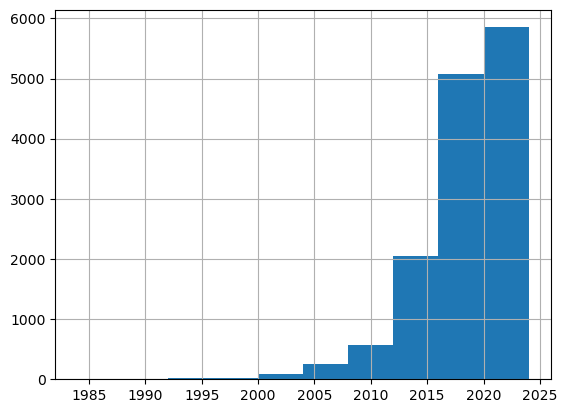

In [8]:
df_cleaned['year'].hist()

<Axes: >

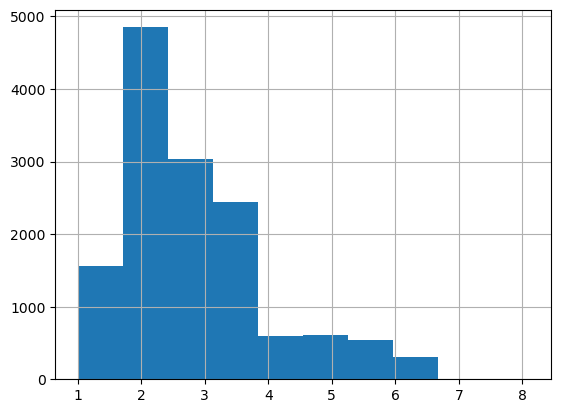

In [9]:
df_cleaned['engine_size'].hist()

<Axes: >

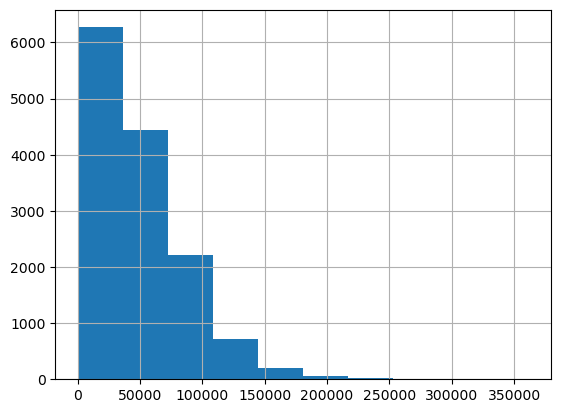

In [10]:
df_cleaned['mileage'].hist()

In [11]:
df_cleaned.head()

brand                   model    year  mileage  \
0          Honda   Pilot Special Edition  2021.0  51299.0   
1  Mercedes-Benz  GL-Class GL 450 4MATIC  2014.0  79279.0   
2     Mitsubishi      Outlander Sport SE  2021.0  31976.0   
3        Porsche                     968  1994.0  92025.0   
4           MINI          Hardtop Cooper  2016.0  43418.0   

                            engine  engine_size       transmission  \
0             3.5L V6 24V GDI SOHC          3.5  9-Speed Automatic   
1  4.7L V8 32V GDI DOHC Twin Turbo          4.7  7-Speed Automatic   
2            2.0L I4 16V MPFI DOHC          2.0      Automatic CVT   
3            3.0L I4 16V MPFI DOHC          3.0  6-Speed Automatic   
4       1.5L I3 12V GDI DOHC Turbo          1.5  6-Speed Automatic   

   automatic_transmission fuel_type         drivetrain  min_mpg  max_mpg  \
0                     1.0  Gasoline   Four-wheel Drive     19.0     26.0   
1                     1.0  Gasoline   Four-wheel Drive     21.0     28.0   
2                     1.0  Gasoline   Four-wheel Drive     24.0     31.0   
3                     1.0  Gasoline   Rear-wheel Drive     10.0     16.0   
4                     1.0  Gasoline  Front-wheel Drive     21.0     31.0   

   damaged  first_owner  personal_using  turbo  alloy_wheels  \
0      0.0          1.0             1.0    0.0           1.0   
1      0.0          0.0             1.0    1.0           1.0   
2      0.0          1.0             0.0    0.0           0.0   
3      1.0          0.0             0.0    0.0           1.0   
4      0.0          0.0             0.0    1.0           1.0   

   adaptive_cruise_control  navigation_system  power_liftgate  backup_camera  \
0                      1.0                0.0             1.0            1.0   
1                      0.0                1.0             1.0            1.0   
2                      0.0                0.0             0.0            1.0   
3                      0.0                0.0             0.0            0.0   
4                      0.0                0.0             0.0            0.0   

   keyless_start  remote_start  sunroof/moonroof  automatic_emergency_braking  \
0            0.0           1.0               1.0                          1.0   
1            0.0           0.0               1.0                          0.0   
2            0.0           0.0               0.0                          0.0   
3            0.0           0.0               0.0                          0.0   
4            1.0           0.0               0.0                          0.0   

   stability_control  leather_seats  memory_seat  third_row_seating  \
0                1.0            1.0          1.0                1.0   
1                1.0            1.0          1.0                1.0   
2                1.0            0.0          0.0                0.0   
3                0.0            1.0          0.0                0.0   
4                1.0            1.0          0.0                0.0   

   apple_car_play/android_auto  bluetooth  usb_port  heated_seats  \
0                          1.0        1.0       0.0           1.0   
1                          0.0        1.0       0.0           0.0   
2                          0.0        1.0       0.0           0.0   
3                          0.0        0.0       0.0           0.0   
4                          0.0        1.0       1.0           0.0   

  interior_color           exterior_color    price  drive_train_dummies  \
0          Black    Modern Steel Metallic  35999.0                    1   
1          Black  Obsidian Black Metallic  22349.0                    1   
2           Gray                   Silver  19499.0                    1   
3         Saddle                    White  12960.0                    3   
4   Carbon Black   Electric Blue Metallic  16500.0                    3   

   performance engine  fuel_type_dummies  efficiency  
0                   1                1.0         1.0  
1         

<Axes: >

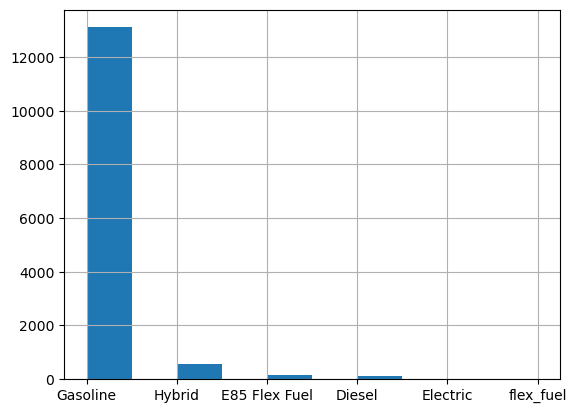

In [12]:
df_cleaned['fuel_type'].hist()

<Axes: >

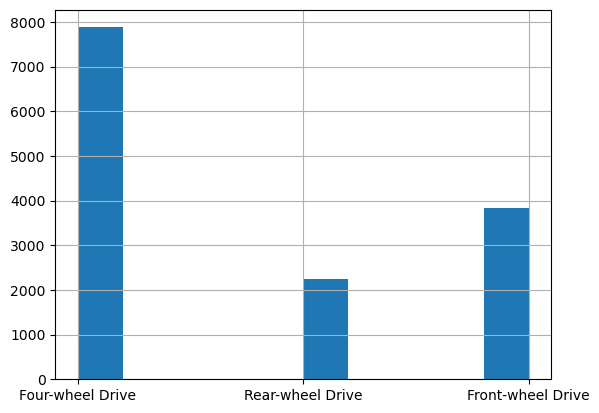

In [13]:
df_cleaned['drivetrain'].hist()

<Axes: >

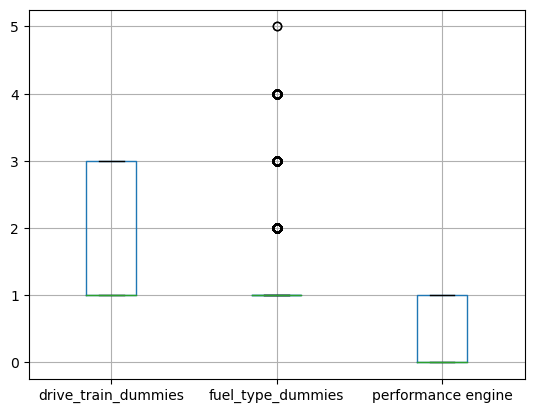

In [14]:
df_cleaned.boxplot(column = ['drive_train_dummies', 'fuel_type_dummies', 'performance engine'])

<Axes: >

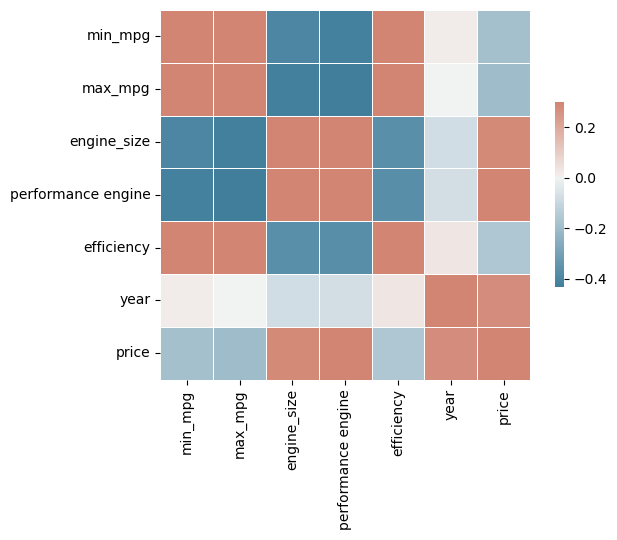

In [15]:
corr = df_cleaned[['min_mpg', 'max_mpg', 'engine_size', 'performance engine', 'efficiency', 'year', 'price']].corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap ,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
df_cleaned.columns

Index(['brand', 'model', 'year', 'mileage', 'engine', 'engine_size',
       'transmission', 'automatic_transmission', 'fuel_type', 'drivetrain',
       'min_mpg', 'max_mpg', 'damaged', 'first_owner', 'personal_using',
       'turbo', 'alloy_wheels', 'adaptive_cruise_control', 'navigation_system',
       'power_liftgate', 'backup_camera', 'keyless_start', 'remote_start',
       'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control',
       'leather_seats', 'memory_seat', 'third_row_seating',
       'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats',
       'interior_color', 'exterior_color', 'price', 'drive_train_dummies',
       'performance engine', 'fuel_type_dummies', 'efficiency'],
      dtype='object')

In [17]:
df_cat = df_cleaned[['brand', 'model', 'year', 'engine',
       'transmission', 'fuel_type', 'drivetrain',
       'damaged', 'first_owner', 'personal_using',
       'turbo', 'alloy_wheels', 'adaptive_cruise_control', 'navigation_system',
       'power_liftgate', 'backup_camera', 'keyless_start', 'remote_start',
       'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control',
       'leather_seats', 'memory_seat', 'third_row_seating',
       'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats',
       'interior_color', 'exterior_color']]

Graph for brand : total 25


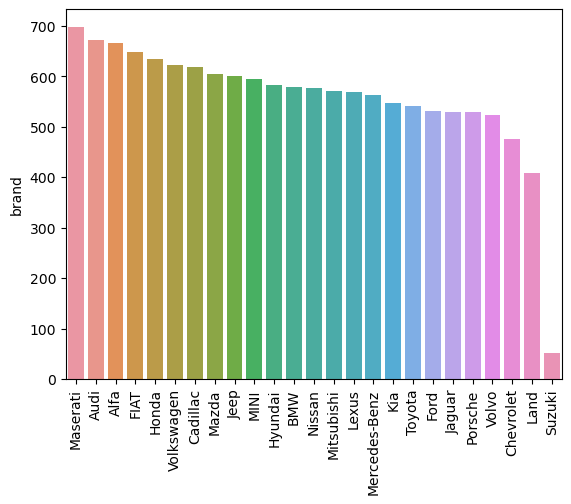

Graph for model : total 2853


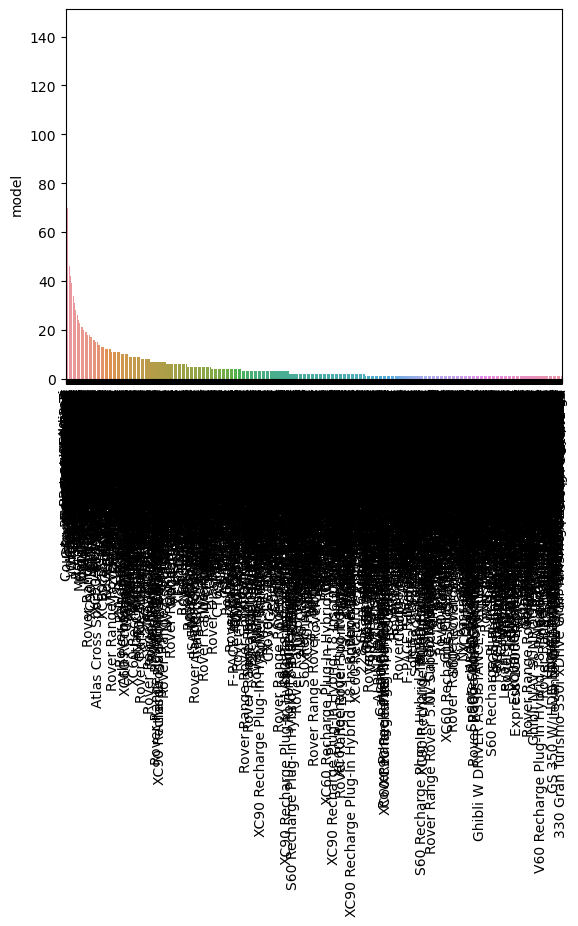

Graph for year : total 40


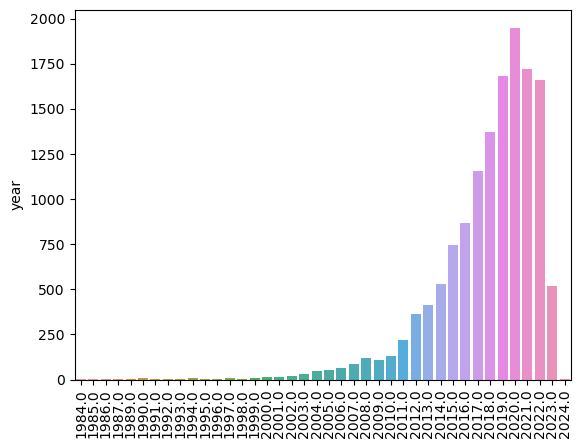

Graph for engine : total 856


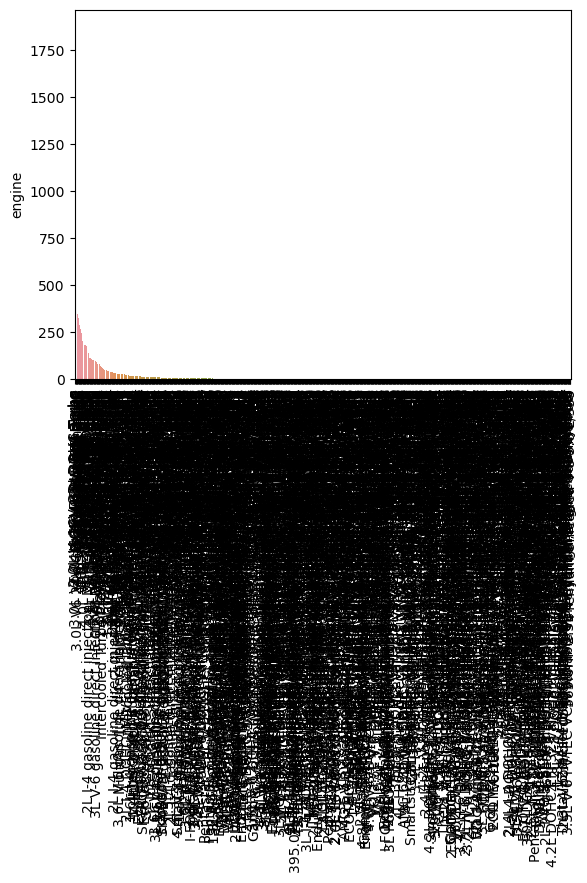

Graph for transmission : total 136


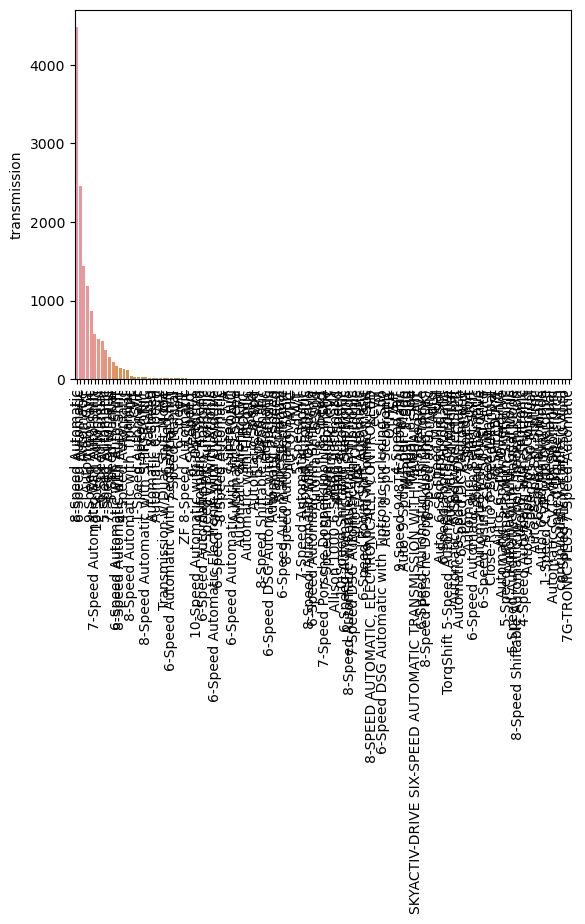

Graph for fuel_type : total 6


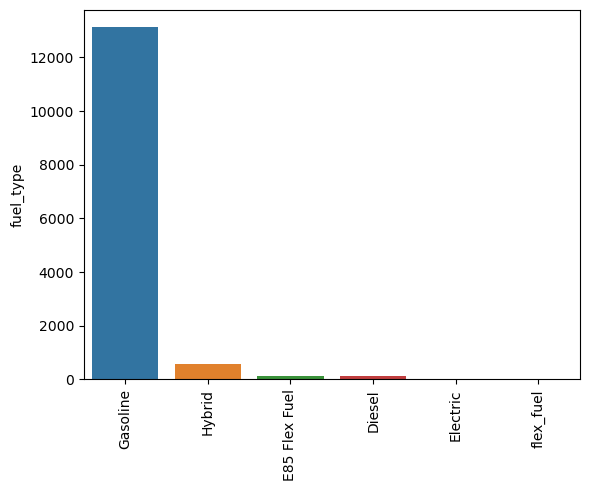

Graph for drivetrain : total 3


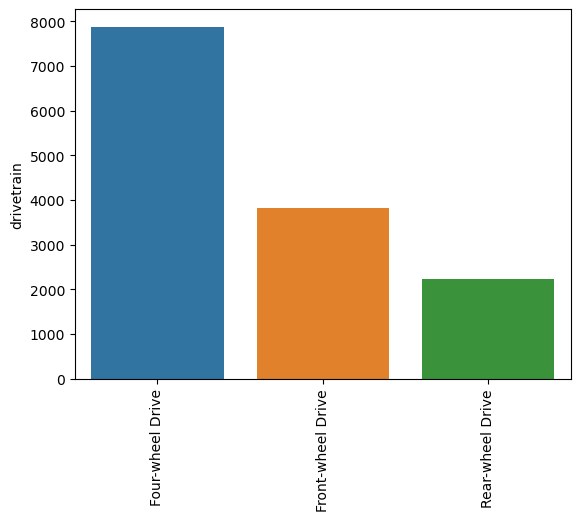

Graph for damaged : total 2


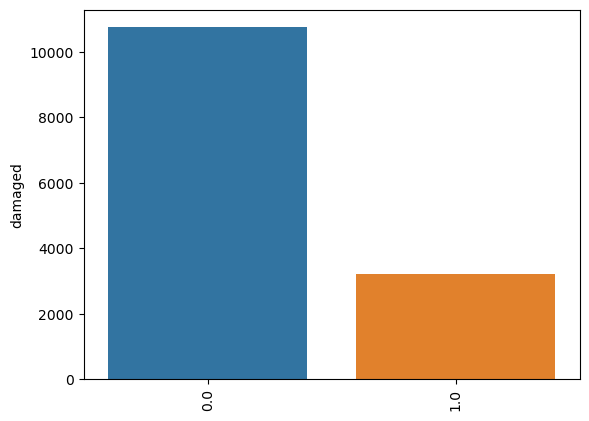

Graph for first_owner : total 2


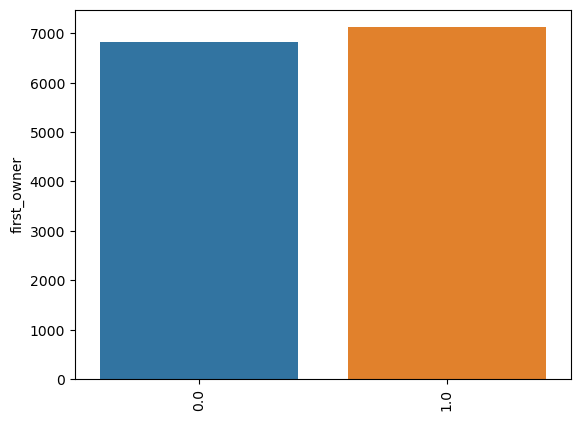

Graph for personal_using : total 2


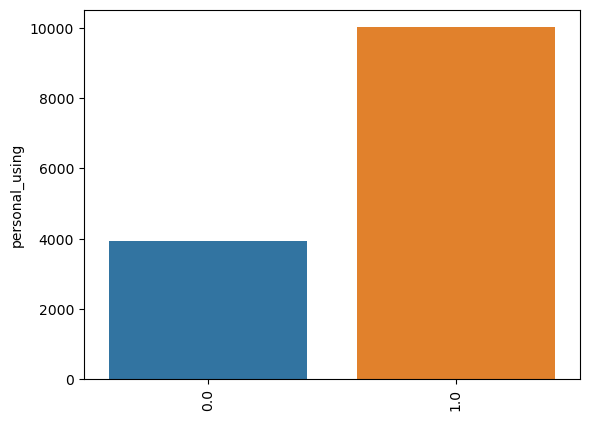

Graph for turbo : total 2


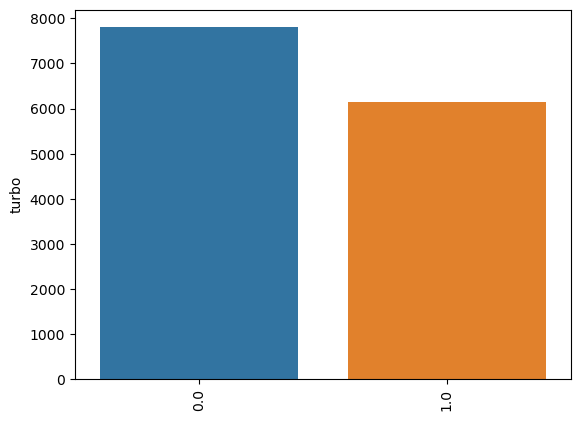

Graph for alloy_wheels : total 2


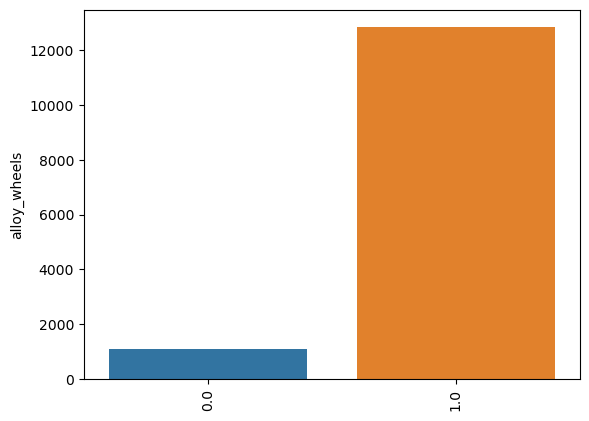

Graph for adaptive_cruise_control : total 2


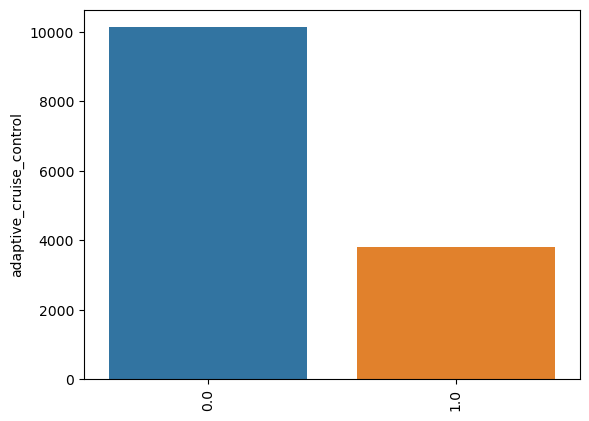

Graph for navigation_system : total 2


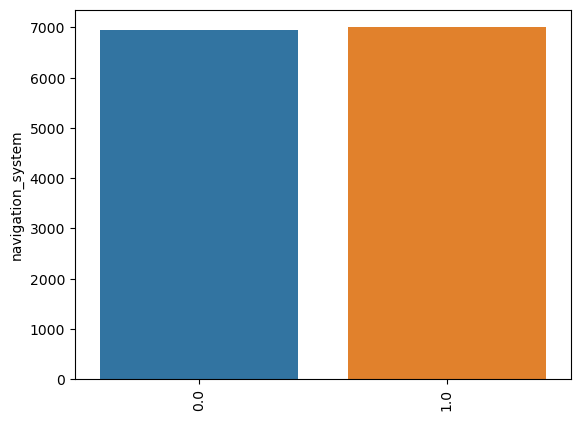

Graph for power_liftgate : total 2


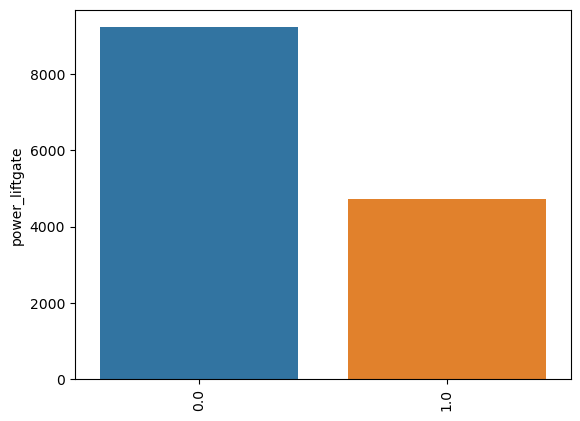

Graph for backup_camera : total 2


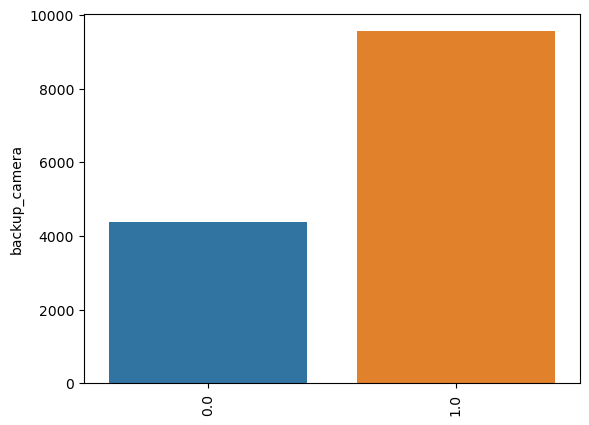

Graph for keyless_start : total 2


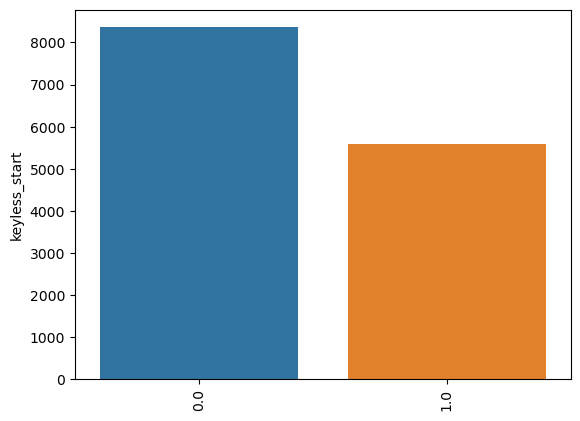

Graph for remote_start : total 2


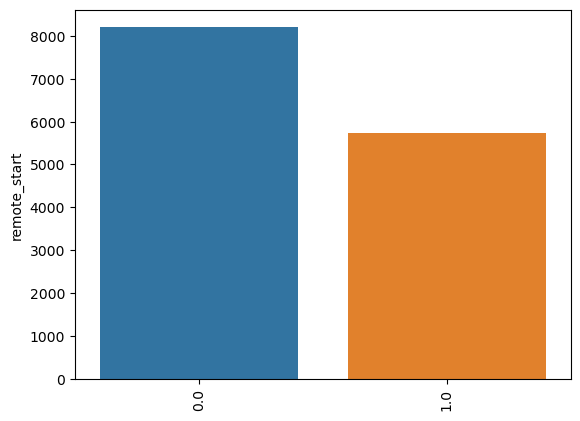

Graph for sunroof/moonroof : total 2


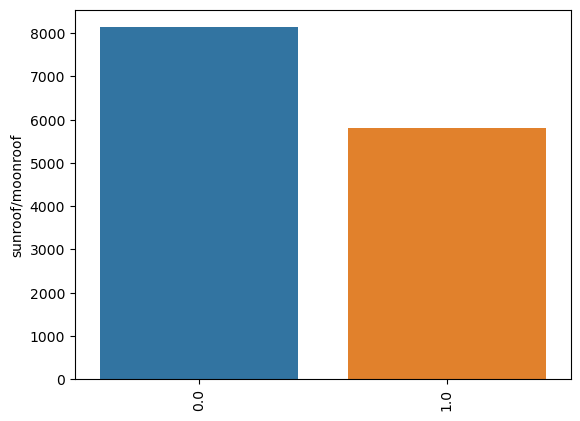

Graph for automatic_emergency_braking : total 2


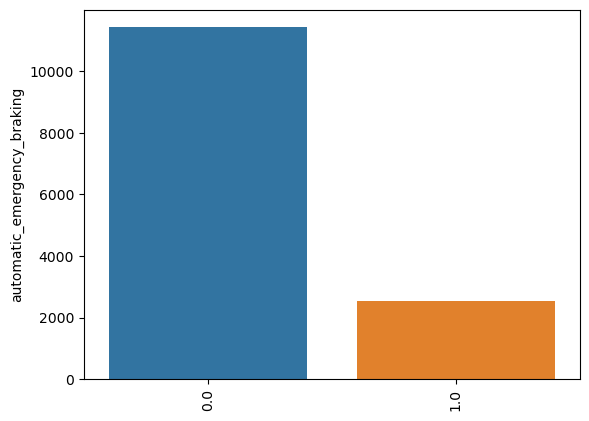

Graph for stability_control : total 2


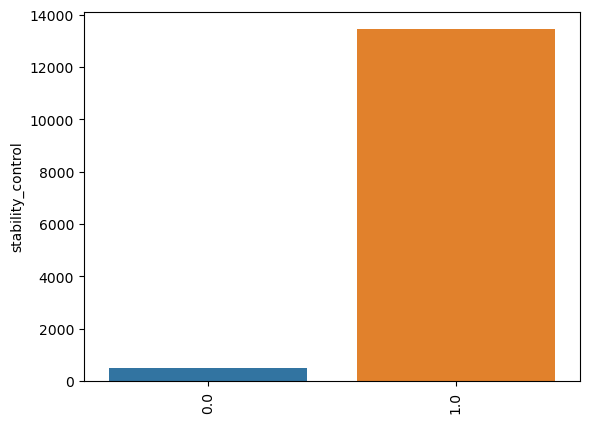

Graph for leather_seats : total 2


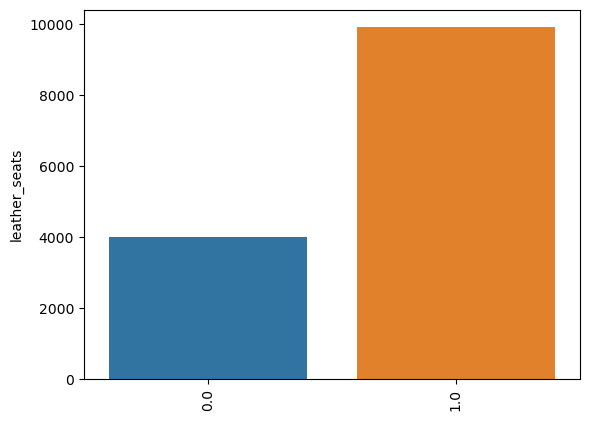

Graph for memory_seat : total 2


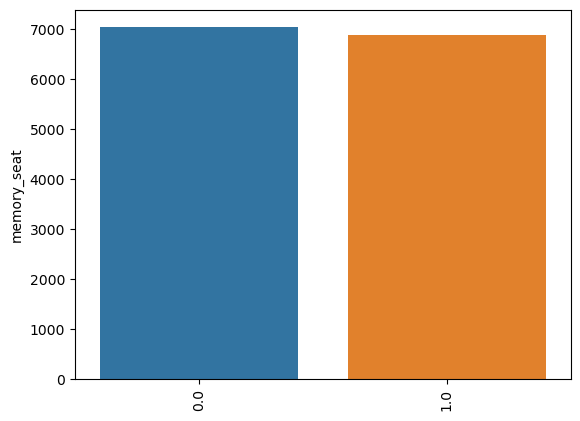

Graph for third_row_seating : total 2


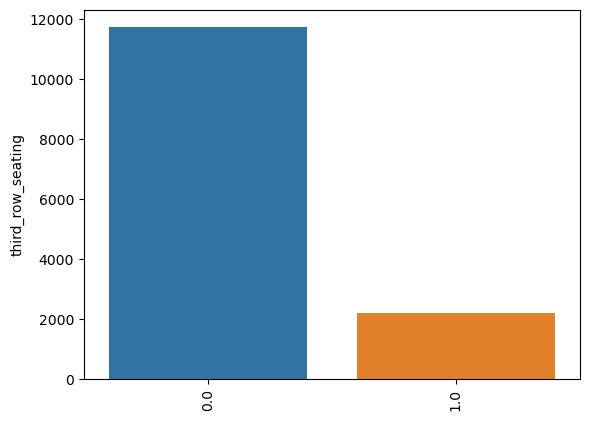

Graph for apple_car_play/android_auto : total 2


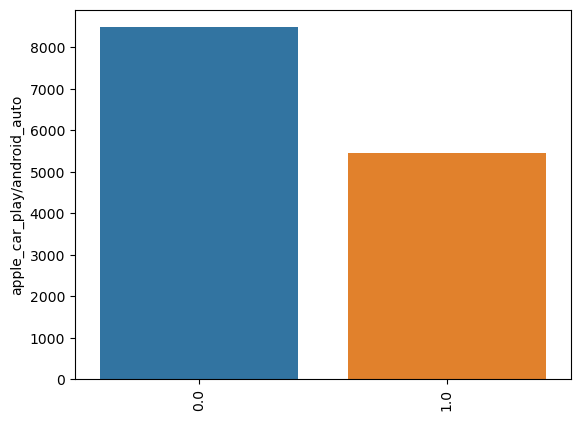

Graph for bluetooth : total 2


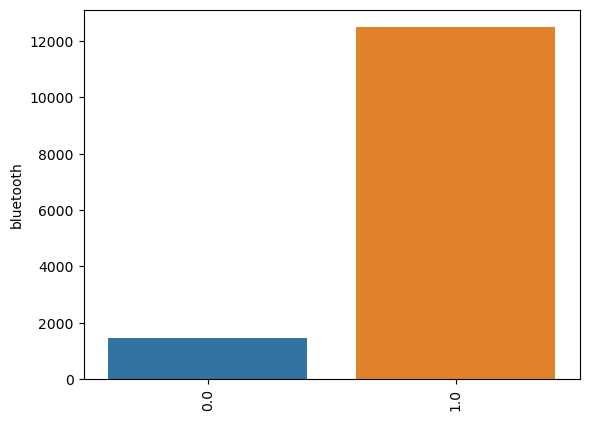

Graph for usb_port : total 2


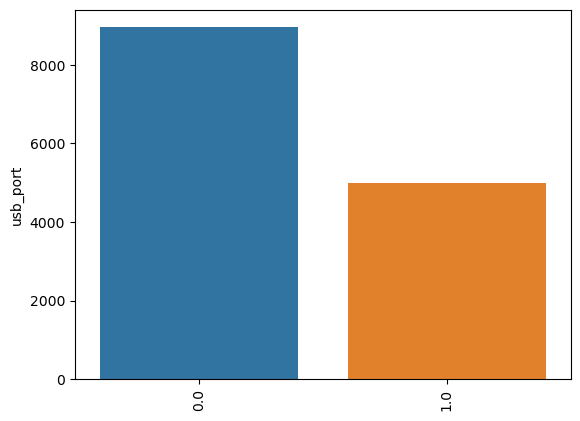

Graph for heated_seats : total 2


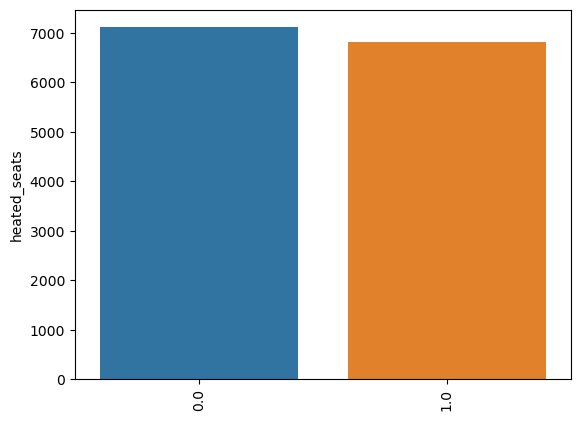

Graph for interior_color : total 815


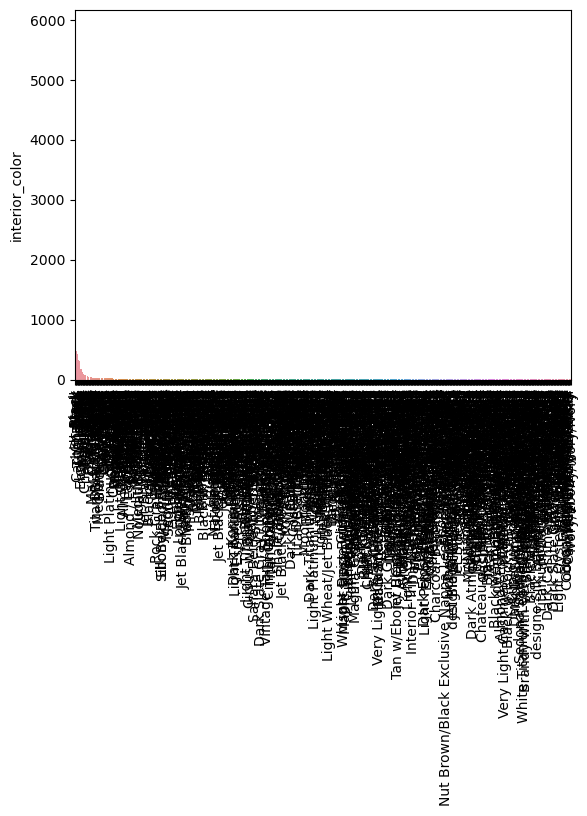

Graph for exterior_color : total 1667


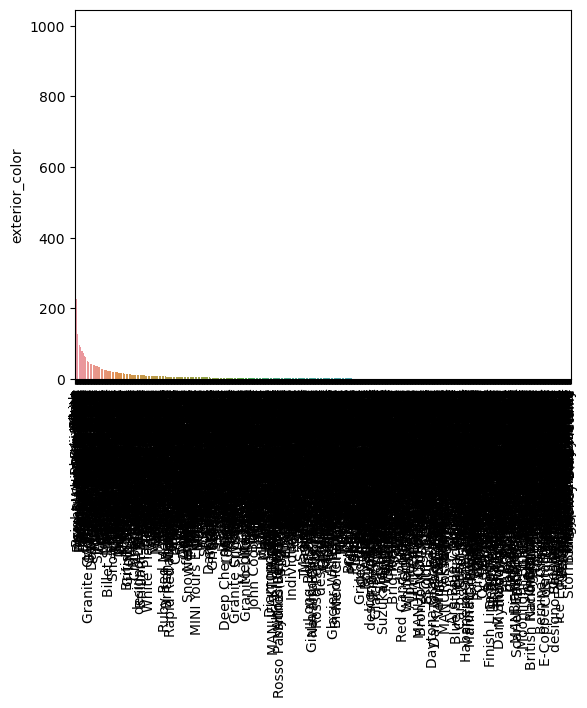

In [18]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s : total %d' % (i, len(cat_num)))
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation=90)
    plt.show()

Graph for model : total 40


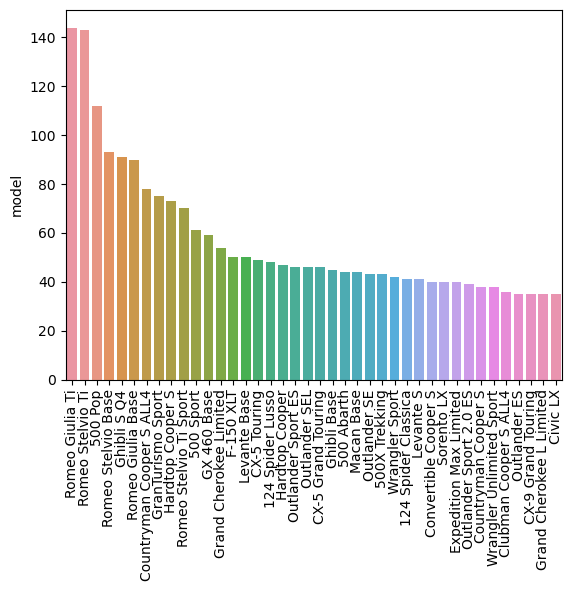

Graph for transmission : total 40


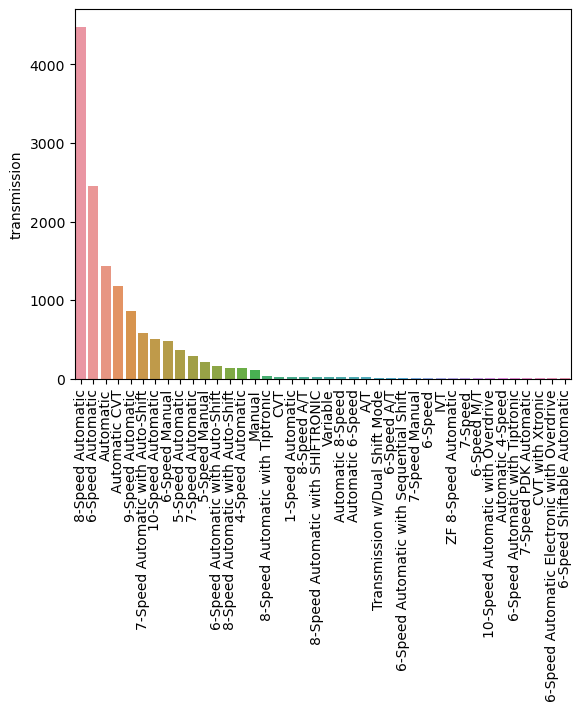

Graph for engine : total 40


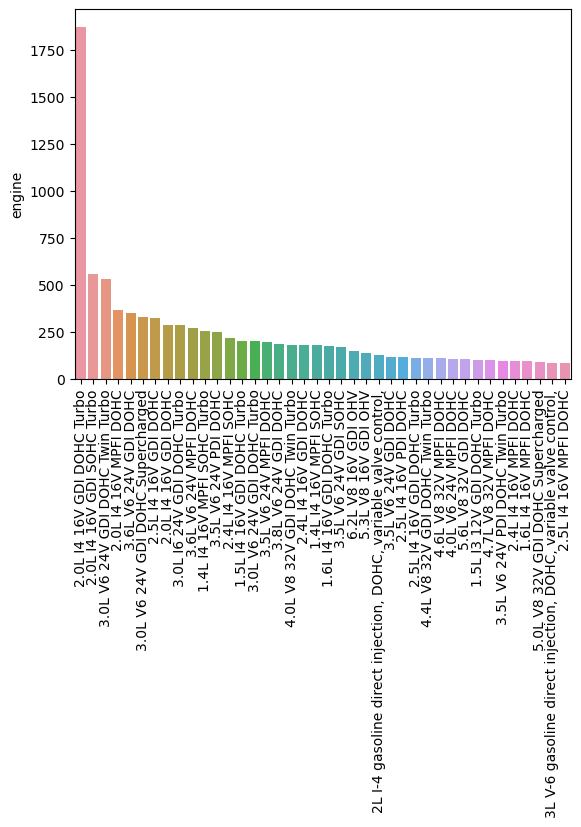

Graph for interior_color : total 40


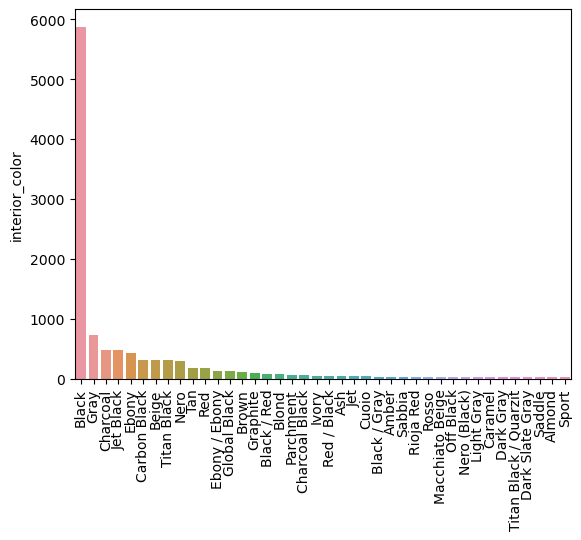

Graph for exterior_color : total 40


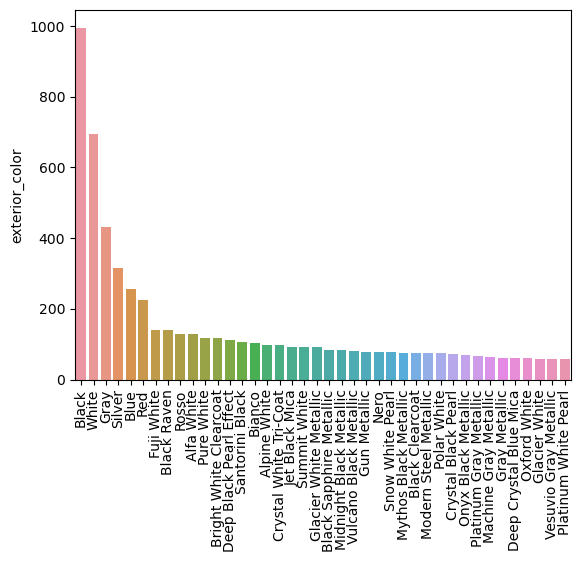

In [19]:
for i in df_cat[['model', 'transmission', 'engine', 'interior_color', 'exterior_color']]:
    cat_num = df_cat[i].value_counts()[:40]
    print('Graph for %s : total %d' % (i, len(cat_num)))
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation=90)
    plt.show()

In [20]:
pd.pivot_table(df_cleaned, index = ['brand', 'model', 'engine_size'] , values = 'price')

price
brand         model                                              engine_size              
Alfa          Romeo 4C Base                                      1.7          5.619450e+04
              Romeo 4C Launch Edition                            1.7          5.699500e+04
              Romeo 4C Spider Spider                             1.7          6.355833e+04
              Romeo 8c Competizione                              4.7          3.500000e+05
              Romeo Giulia                                       2.0          3.129733e+04
              Romeo Giulia AWD                                   2.0          3.083900e+04
              Romeo Giulia Base                                  2.0          2.995348e+04
              Romeo Giulia Quadrifoglio                          2.9          5.082156e+04
              Romeo Giulia Ti                                    2.0          3.120297e+04
              Romeo Giulia Ti Lusso                              2.0          2.757175e+04
              Romeo Giulia Ti Sport                              2.0          3.488867e+04
              Romeo Giulia Veloce                                2.0          4.224511e+04
              Romeo Spider Graduate                              2.0          1.187400e+04
              Romeo Spider Quadrifoglio                          2.0          1.230000e+04
              Romeo Spider Veloce                                2.0          1.640000e+04
              Romeo Stelvio 4DR SUV AWD                          2.9          4.989900e+04
              Romeo Stelvio Base                                 2.0          3.037740e+04
              Romeo Stelvio Quadrifoglio                         2.9          5.661648e+04
              Romeo Stelvio Sport                                2.0          2.850968e+04
              Romeo Stelvio Sprint                               2.0          3.649267e+04
              Romeo Stelvio Ti                                   2.0          3.386004e+04
              Romeo Stelvio Ti Lusso                             2.0          3.208867e+04
              Romeo Stelvio Ti Sport                             2.0          3.426373e+04
              Romeo Stelvio Veloce                               2.0          4.694733e+04
Audi          A3 1.8T Premium                                    1.8          1.632033e+04
              A3 2.0 TDI Premium                                 2.0          1.347450e+04
              A3 2.0 TDI Premium Plus                            2.0          1.950200e+04
              A3 2.0T Premium                                    2.0          2.206377e+04
              A3 2.0T Premium Plus                               2.0          2.065167e+04
              A3 2.0T S line Premium                             2.0          2.747450e+04
              A3 2.0T S line Premium Plus                        2.0          3.318000e+04
              A3 40 Premium                                      2.0          3.531367e+04
              A3 Premium Plus                                    2.0          3.499350e+04
              A4 1.8T Cabriolet                                  1.8          8.999000e+03
              A4 2.0T                                            2.0          5.744500e+03
              A4 2.0T Premium                                    2.0          2.160050e+04
              A4 2.0T Premium Plus                               2.0          2.267156e+04
              A4 2.0T Premium Plus quattro                       2.0          1.122350e+04
              A4 2.0T Premium quattro                            2.0          1.158900e+04
              A4 2.0T Titanium Premium                           2.0          2.778150e+04
              A4 40 Premium                                      2.0          3.496840e+04
              A4 40 Premium Plus                                 2.0          3.450900e+04
              A4 45 Premium                                      2.0          3.2

In [21]:
pd.pivot_table(df_cleaned, index=['brand', 'model'], values= 'price').sort_values('price', ascending = False)

price
brand         model                                                           
BMW           750 iL                                              1.750000e+06
Porsche       Carrera GT                                          1.599000e+06
              911 GT2 RS                                          7.950000e+05
              911 Speedster                                       3.649000e+05
Land          Rover Range Rover SV                                3.500000e+05
Alfa          Romeo 8c Competizione                               3.500000e+05
Land          Rover Range Rover SV LWB                            2.748690e+05
Maserati      MC20 Base                                           2.680776e+05
Porsche       718 Cayman GT4 RS                                   2.599910e+05
Land          Rover Defender 90 First Edition                     2.569750e+05
Porsche       911 GT3                                             2.345786e+05
              911 GT3 RS                                          2.244583e+05
Land          Rover Range Rover Autobiography                     2.232844e+05
Mercedes-Benz AMG G 63 4MATIC                                     2.222020e+05
Porsche       911 Carrera 2 Cabriolet                             2.199900e+05
Mercedes-Benz Maybach S 580 4MATIC                                2.139793e+05
Land          Rover Range Rover First Edition LWB                 2.099900e+05
Cadillac      Escalade ESV V-Series                               2.039000e+05
Porsche       Cayenne Turbo GT                                    1.985873e+05
Land          Rover Range Rover First Edition                     1.966000e+05
Cadillac      Escalade V-Series                                   1.882910e+05
Porsche       911                                                 1.881270e+05
Mercedes-Benz AMG G 63 Base                                       1.845920e+05
              Maybach GLS 600 4MATIC                              1.802480e+05
              Sprinter 3500XD High Roof                           1.778930e+05
Porsche       Cayenne E-Hybrid Coupe Turbo S                      1.760040e+05
Land          Rover Range Rover P530 SE                           1.689046e+05
Porsche       911 Turbo S                                         1.686140e+05
Mercedes-Benz AMG GT R                                            1.684875e+05
              AMG SL 63 Base                                      1.649945e+05
Land          Rover Range Rover P530 SE AWD 4dr SUV               1.599950e+05
Audi          R8 5.2 V10                                          1.516160e+05
Land          Rover Range Rover P400 SE                           1.473514e+05
Porsche       Cayenne Turbo Coupe AWD                             1.459905e+05
              Panamera Turbo S E-Hybrid                           1.449000e+05
              718 Cayman GT4                                      1.440445e+05
              Panamera Sport Turismo GTS                          1.406785e+05
              911 Turbo                                           1.390191e+05
              911 Targa 4S                                        1.373837e+05
Lexus         LX 600 Luxury                                       1.372620e+05
Mercedes-Benz G-Class G 550 4MATIC                                1.344763e+05
              AMG GT C                                            1.338150e+05
Porsche       911 4 GTS                                           1.329920e+05
Mercedes-Benz AMG SL 55 Base                                      1.319880e+05
Porsche       911 Carrera GTS                                     1.289950e+05
Lexus         LX 600 F SPORT                                      1.287395e+05
Porsche       718 Boxster GTS 4.0                                 1.263900e+05
BMW           ALPINA XB7 Base                                     1.263745e+05
Porsche       911 Targa 4                                         1.259825e+05
Land          Rover Range Rover Sport P400 S

In [22]:
df_pivot = df_cleaned[['brand', 'model', 'year', 'engine',
       'transmission', 'fuel_type', 'drivetrain',
       'damaged', 'first_owner', 'personal_using',
       'turbo', 'alloy_wheels', 'adaptive_cruise_control', 'navigation_system',
       'power_liftgate', 'backup_camera', 'keyless_start', 'remote_start',
       'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control',
       'leather_seats', 'memory_seat', 'third_row_seating',
       'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats',
       'interior_color', 'exterior_color', 'price']]

In [23]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot, index = i , values = 'price').sort_values('price', ascending = False).head(50))

brand
                      price
brand                      
Porsche        80046.580340
Maserati       56018.581897
Land           53772.923833
Mercedes-Benz  53660.365897
BMW            44392.245250
Cadillac       43230.546191
Audi           40553.369048
Lexus          40188.299296
Jeep           37063.983333
Chevrolet      35468.381053
Volvo          35420.608031
Alfa           34504.616192
Ford           33233.005650
Jaguar         31969.250943
Toyota         30774.763838
Kia            28474.158759
Nissan         28269.089965
Volkswagen     26970.473430
Honda          25716.288644
Mazda          24846.140728
Hyundai        24603.294320
MINI           21053.805042
Mitsubishi     20248.022727
FIAT           15557.409020
Suzuki          7891.254902
model
                                                price
model                                                
750 iL                                   1.750000e+06
Carrera GT                               1.599000e+06
911 GT2 RS      

ValueError: Grouper for 'price' not 1-dimensional

In [24]:
pd.pivot_table(df_pivot, index = ['brand', 'year'] , values = 'price', aggfunc = 'sum').sort_values('price', ascending = False)

price
brand         year              
Maserati      2022.0  12496938.0
Jeep          2022.0   7804843.0
Land          2023.0   7345608.0
Porsche       2022.0   7262265.0
Maserati      2019.0   6697549.0
Mercedes-Benz 2020.0   6486021.0
Porsche       2020.0   6080381.0
              2019.0   5996747.0
Alfa          2019.0   5818018.0
BMW           2020.0   5772550.0
Audi          2021.0   5514559.0
              2020.0   5372080.0
Mercedes-Benz 2021.0   5318615.0
Cadillac      2021.0   5031310.0
Kia           2022.0   4980482.0
Maserati      2018.0   4862653.0
Volvo         2020.0   4816278.0
Lexus         2022.0   4760085.0
Cadillac      2022.0   4612282.0
Ford          2021.0   4507303.0
Chevrolet     2021.0   4471919.0
Alfa          2020.0   4437726.0
BMW           2021.0   4358114.0
Jeep          2021.0   4308464.0
Mercedes-Benz 2019.0   4232545.0
Porsche       2021.0   4230588.0
Volvo         2022.0   4174236.0
Volkswagen    2022.0   4125336.0
Honda         2022.0   4080754.0
Cadillac      2020.0   4069033.0
Audi          2019.0   4052358.0
Alfa          2021.0   4018889.0
Mercedes-Benz 2022.0   3921142.0
Lexus         2021.0   3674860.0
Porsche       2018.0   3611260.0
Cadillac      2023.0   3596044.0
Lexus         2020.0   3585479.0
Toyota        2021.0   3508614.0
Volkswagen    2021.0   3506521.0
Audi          2022.0   3443252.0
BMW           2019.0   3435741.0
              2022.0   3414720.0
Hyundai       2022.0   3354899.0
Alfa          2022.0   3267148.0
Jaguar        2018.0   3209107.0
Audi          2018.0   3185081.0
Jaguar        2020.0   3185016.0
Maserati      2017.0   3120379.0
Mazda         2021.0   3112006.0
Alfa          2018.0   3056706.0
Volvo         2021.0   3056446.0
Mercedes-Benz 2018.0   3044588.0
Toyota        2020.0   2934147.0
Kia           2021.0   2923085.0
Nissan        2022.0   2907941.0
Jaguar        2017.0   2877362.0
Mitsubishi    2022.0   2766246.0
Lexus         2019.0   2750574.0
Toyota        2022.0   2699017.0
Honda         2020.0   2653188.0
Ford          2020.0   2624336.0
Cadillac      2019.0   2568145.0
Ford          2022.0   2556744.0
Honda         2021.0   2527105.0
Hyundai       2021.0   2519509.0
Mazda         2020.0   2512239.0
Hyundai       2020.0   2510810.0
Volkswagen    2019.0   2428145.0
Porsche       2023.0   2423006.0
Chevrolet     2020.0   2367793.0
Maserati      2021.0   2348111.0
Porsche       2017.0   2343038.0
Jeep          2020.0   2251512.0
BMW           2018.0   2243249.0
Ford          2019.0   2240929.0
Land          2020.0   2237366.0
MINI          2020.0   2199386.0
Kia           2020.0   2188132.0
Jeep          2023.0   2185897.0
Maserati      2020.0   2184400.0
Land          2019.0   2173230.0
Nissan        2021.0   2026506.0
              2020.0   2025810.0
Land          2021.0   2018740.0
Toyota        2019.0   2003965.0
Volvo         2019.0   1994719.0
Mazda         2022.0   1990057.0
Kia           2023.0   1984867.0
Honda         2019.0   1976558.0
Porsche       2016.0   1951100.0
Audi          2017.0   1939039.0
Land          2017.0   1910400.0
Lexus         2018.0   1846205.0
Chevrolet     2022.0   1835817.0
Mercedes-Benz 2017.0   1833468.0
FIAT          2018.0   1823339.0
Porsche       2005.0   1809454.0
Mazda         2019.0   1807224.0
Ford          2018.0   1792549.0
Mazda         2023.0   1781847.0
Mitsubishi    2020.0   1781238.0
Volkswagen    2020.0   1775303.0
BMW           1996.0   1750000.0
Hyundai       2023.0   1749989.0
FIAT          2017.0   1723501.0
MINI          2019.0   1696352.0
Chevrolet     2019.0   1650424.0
Land          2022.0   1550259.0
Cadillac      2018.0   1511494.0
              2016.0   1498760.0
Jaguar        2019.0   1492595.0
Nissan        2019.0   1491238.0
Mitsubishi    2021.0   1470528.0
Mercedes-Benz 2016.0   1463533.0
Nissan        2023.0   1449882.0
Maserati      2015.0   1434372.0
Lexus         2023.0   1428686.0
Land          2018.0   1408512.0
Jeep          2018.0   1406545.0
Chevrolet     2018.0   1368028.0
M

In [25]:
pd.pivot_table(df_pivot, index = ['brand', 'year'] , values = 'price', aggfunc = 'max').sort_values('price', ascending = False)

price
brand         year             
BMW           1996.0  1750000.0
Porsche       2005.0  1599000.0
              2019.0   795000.0
Land          2021.0   449000.0
Hyundai       2021.0   381611.0
Alfa          2008.0   350000.0
Land          2023.0   350000.0
Maserati      2022.0   294900.0
Porsche       2022.0   289995.0
              2023.0   269989.0
Mercedes-Benz 2022.0   244950.0
Porsche       2021.0   234486.0
              1991.0   219995.0
              1994.0   219990.0
              2016.0   214900.0
Cadillac      2023.0   203900.0
Mercedes-Benz 2020.0   199975.0
Land          1994.0   198888.0
Mercedes-Benz 2023.0   196249.0
              2021.0   195880.0
Audi          2020.0   174998.0
Land          2022.0   159900.0
Mercedes-Benz 2019.0   153950.0
Porsche       2017.0   152990.0
              2018.0   152880.0
              2020.0   145000.0
Lexus         2023.0   144998.0
Porsche       2015.0   144200.0
Audi          2022.0   142591.0
Porsche       2004.0   139995.0
Audi          2018.0   139950.0
              2017.0   139900.0
Mercedes-Benz 2018.0   137000.0
BMW           2022.0   132750.0
Lexus         2022.0   132500.0
Audi          2021.0   129888.0
Porsche       2014.0   125900.0
BMW           2021.0   124998.0
Nissan        2014.0   119999.0
Cadillac      2022.0   119995.0
Porsche       2011.0   118790.0
Cadillac      2021.0   117172.0
Maserati      2021.0   115985.0
Toyota        2021.0   114825.0
Ford          2017.0   110987.0
Nissan        2016.0   109999.0
Porsche       2003.0   109995.0
Nissan        2018.0   108995.0
Chevrolet     2009.0   104999.0
Jeep          2022.0   104435.0
Ford          2022.0   103364.0
Porsche       2012.0   100200.0
BMW           2020.0    99990.0
Audi          2012.0    99895.0
Maserati      2023.0    97950.0
Porsche       2008.0    94991.0
Maserati      2018.0    94734.0
Lexus         2021.0    93991.0
Chevrolet     2022.0    93950.0
Nissan        2015.0    92800.0
Mercedes-Benz 2017.0    92789.0
Audi          2014.0    91995.0
Porsche       2009.0    89995.0
Chevrolet     2020.0    89991.0
Maserati      2019.0    89990.0
Chevrolet     2021.0    89988.0
BMW           2019.0    89988.0
Jaguar        2023.0    89977.0
Ford          2020.0    89778.0
Lexus         2020.0    88994.0
BMW           2023.0    88872.0
Jaguar        2022.0    85995.0
Mercedes-Benz 2016.0    85990.0
Maserati      2020.0    85800.0
Chevrolet     2023.0    85775.0
Alfa          2023.0    85477.0
Jaguar        2021.0    84900.0
Jeep          2023.0    84548.0
Mercedes-Benz 2013.0    82991.0
Alfa          2022.0    82792.0
Land          2019.0    82374.0
              2020.0    81990.0
Jaguar        2017.0    81420.0
Lexus         2019.0    80561.0
Toyota        2023.0    79999.0
              2020.0    79998.0
Porsche       2007.0    79990.0
Land          2018.0    79900.0
Jaguar        2018.0    77900.0
Land          2017.0    77798.0
Mercedes-Benz 2015.0    77777.0
Cadillac      2018.0    77000.0
Audi          2009.0    76998.0
Mercedes-Benz 2014.0    75950.0
Lexus         2018.0    74998.0
Cadillac      2020.0    74995.0
              2019.0    74916.0
Mercedes-Benz 2011.0    74800.0
Ford          2016.0    72995.0
Cadillac      2017.0    72994.0
Volvo         2022.0    72900.0
Cadillac      2012.0    71999.0
BMW           2010.0    71900.0
Jeep          2021.0    70988.0
Porsche       2013.0    70000.0
Nissan        2010.0    70000.0
Audi          2008.0    69995.0
Maserati      2017.0    69990.0
Jaguar        2002.0    69988.0
Ford          2018.0    69985.0
Alfa          2018.0    69977.0
Jaguar        2020.0    69950.0
Chevrolet     2019.0    69900.0
Porsche       2010.0    69500.0
Nissan        2012.0    67995.0
Ford          2021.0    67990.0
Toyota        2022.0    67000.0
Alfa          2015.0    66997.0
Chevrolet     2015.0    66500.0
Nissan        2022.0    66500.0
Volvo         2023.0    66000.0
Ford          2014.0    65950.0
Chevrolet     2017.0    65000.0
Volvo         2021.0    64

In [26]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

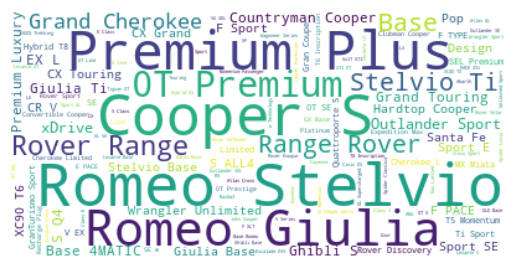

In [36]:
# Gathering text
text = ' '.join(df_cleaned['model'].astype(str))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color = 'white', max_words = 1000).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()